# **We will import the necessary libraries here**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## 1. 🧳 **Business Understanding:**

Worldwide, bike-sharing programs are now an essential part of urban transportation networks, providing consumers with an adaptable and reasonably priced option for short-term bike rentals. The company wants to predict customer demand and acquire insights into user behavior in order to optimize the bike-sharing system. It is essential to comprehend the variables that affect bike rentals, such as temperature, season, and weather, in order to effectively manage bike availability and improve user experience. For the bike-sharing program to be successful, it is necessary to predict with precision how many users will rent bikes in different scenarios. This will enable proactive system management and resource allocation.


# **2. 💡 Data Understanding** :
 A thorough data cleaning procedure was required after the preliminary data exploration revealed missing values, particularly in weather-related features. Pre-processing procedures ensured the integrity of the dataset for subsequent analysis by handling null values with forward-fill and suitable replacements. To provide a comprehensive picture of customer behavior, more temporal features were extracted and weather attributes were combined to create new features. To find patterns and trends that help with precise forecasting and bike-sharing system optimization, the next steps entail in-depth time-series analysis, visualization, and modeling.


#**Reading the data**

In [ ]:
df = pd.read_csv("dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [ ]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,?,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,?,?,...,?,?,?,?,?,?,330.0,629.0,959.0,?
1,2011-01-02,?,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,?,...,?,?,?,?,?,?,130.0,651.0,781.0,?
2,2011-01-03,?,-3.442857,7.464286,-3.060000,1.878824,3.625000,?,?,?,...,?,?,?,?,?,?,120.0,1181.0,1301.0,?
3,2011-01-04,?,-5.957143,4.642857,-3.100000,0.000000,1.800000,?,?,?,...,?,?,?,?,?,?,107.0,1429.0,1536.0,?
4,2011-01-05,?,-4.293333,6.113333,-1.772727,0.000000,2.950000,?,?,?,...,?,?,?,?,?,?,82.0,1489.0,1571.0,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,?,?,...,?,?,?,?,?,?,1150.0,4280.0,5430.0,?
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,?,...,?,?,?,?,?,?,166.0,1959.0,2125.0,?
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,?,...,?,?,?,?,?,?,1756.0,4252.0,6008.0,?
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,?,?,?,...,?,?,?,?,?,?,1295.0,3634.0,4929.0,?


Many values in the provided data are missing. We first replace all instances of '?' with null values to make handling these missing values easier. We then use techniques for missing value imputation to handle and effectively manage the missing data in our code.

#**Data cleaning**

In [ ]:
#Replace '?' with null values
df.replace(to_replace = '?', value = np.NaN,inplace=True)

In [ ]:
df.columns

Index(['date', 'temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'precip',
       'wind', 'wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown', 'casual', 'registered',
       'total_cust', 'holiday'],
      dtype='object')

In [85]:
#Since the values in the weather columns should either be 0 or 1, remove all null values individually.
weather_columns = [x for x in df.columns if 'wt' in x]
for i in weather_columns:
  df[i].fillna(0,inplace = True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2101 non-null   object 
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   object 
 8   wt_heavy_fog       2922 non-null   object 
 9   wt_thunder         2922 non-null   object 
 10  wt_sleet           2922 non-null   object 
 11  wt_hail            2922 non-null   object 
 12  wt_glaze           2922 non-null   object 
 13  wt_haze            2922 non-null   object 
 14  wt_drift_snow      2922 non-null   object 
 15  wt_high_wind       2922 non-null   object 
 16  wt_mist            2922 

In [87]:
#Convert the columns to float type
df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']] = df[['wt_fog', 'wt_heavy_fog', 'wt_thunder', 'wt_sleet', 'wt_hail',
       'wt_glaze', 'wt_haze', 'wt_drift_snow', 'wt_high_wind', 'wt_mist',
       'wt_drizzle', 'wt_rain', 'wt_freeze_rain', 'wt_snow', 'wt_ground_fog',
       'wt_ice_fog', 'wt_freeze_drizzle', 'wt_unknown','casual','registered','total_cust','holiday']].apply(pd.to_numeric)

In [88]:
df

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,NaN,-1.566667,11.973333,2.772727,0.069333,2.575000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,NaN
1,2011-01-02,NaN,0.880000,13.806667,7.327273,1.037349,3.925000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,NaN
2,2011-01-03,NaN,-3.442857,7.464286,-3.060000,1.878824,3.625000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,NaN
3,2011-01-04,NaN,-5.957143,4.642857,-3.100000,0.000000,1.800000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,NaN
4,2011-01-05,NaN,-4.293333,6.113333,-1.772727,0.000000,2.950000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.5,-3.591667,9.125000,-1.055556,0.024096,2.100000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,NaN
2918,2018-12-28,8.233333333333333,0.608333,11.208333,8.088889,16.843820,2.000000,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,NaN
2919,2018-12-29,9.5,3.925000,12.416667,5.311111,11.550575,3.666667,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,NaN
2920,2018-12-30,4.8,0.816667,11.066667,2.088889,0.104651,1.200000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,NaN


The weather columns' null values have all been cleaned, as can be seen. The missing values in the temp_avg column will now be imputed. For the time being, we use the average of temp_max and temp_min due to simplicity.

In [92]:
# Assuming df is your DataFrame
df['temp_avg'] = pd.to_numeric(df['temp_avg'], errors='coerce')
df['temp_avg'].fillna((df['temp_max'] + df['temp_min']) / 2, inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [94]:
df.isnull().sum()

date                    0
temp_avg                0
temp_min                0
temp_max                0
temp_observ             0
precip                  0
wind                    0
wt_fog                  0
wt_heavy_fog            0
wt_thunder              0
wt_sleet                0
wt_hail                 0
wt_glaze                0
wt_haze                 0
wt_drift_snow           0
wt_high_wind            0
wt_mist                 0
wt_drizzle              0
wt_rain                 0
wt_freeze_rain          0
wt_snow                 0
wt_ground_fog           0
wt_ice_fog              0
wt_freeze_drizzle       0
wt_unknown              0
casual                  4
registered              4
total_cust              4
holiday              2833
dtype: int64

Determine which values in the total_customers columns are missing.

In [95]:
df[df['casual'].isna()]

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
1848,2016-01-23,-4.366667,-6.128571,-2.392857,-4.688889,42.045946,8.08,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1849,2016-01-24,-2.666667,-7.985714,-1.028571,-6.366667,19.339130,3.75,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1850,2016-01-25,-5.133333,-11.128571,2.028571,-9.877778,0.000000,1.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1851,2016-01-26,2.333333,-7.871429,7.471429,3.588889,0.000000,2.85,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


It is evident that the four missing values in the data are consistent across all customer columns. Either the rows can be eliminated or the data can be imputed. We perform the forward filling imputation because the attributes are typically closer to one another in the upcoming timestamp because the data is a time series.

In [96]:
df[['casual','registered','total_cust']] = df[['casual','registered','total_cust']].fillna(method = 'ffill')

In [97]:
#Fill the values in holiday as 0 if it is not a holiday else it is given as 1
df['holiday'].fillna(0,inplace=True)

In [98]:
#Round of the values to 2 decimal places
df_v2 = df.round(2)

In [99]:
df_v2.isnull().sum()

date                 0
temp_avg             0
temp_min             0
temp_max             0
temp_observ          0
precip               0
wind                 0
wt_fog               0
wt_heavy_fog         0
wt_thunder           0
wt_sleet             0
wt_hail              0
wt_glaze             0
wt_haze              0
wt_drift_snow        0
wt_high_wind         0
wt_mist              0
wt_drizzle           0
wt_rain              0
wt_freeze_rain       0
wt_snow              0
wt_ground_fog        0
wt_ice_fog           0
wt_freeze_drizzle    0
wt_unknown           0
casual               0
registered           0
total_cust           0
holiday              0
dtype: int64

All of the data's missing values have been eliminated.

In [100]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2922 non-null   object 
 1   temp_avg           2922 non-null   float64
 2   temp_min           2922 non-null   float64
 3   temp_max           2922 non-null   float64
 4   temp_observ        2922 non-null   float64
 5   precip             2922 non-null   float64
 6   wind               2922 non-null   float64
 7   wt_fog             2922 non-null   float64
 8   wt_heavy_fog       2922 non-null   float64
 9   wt_thunder         2922 non-null   float64
 10  wt_sleet           2922 non-null   float64
 11  wt_hail            2922 non-null   float64
 12  wt_glaze           2922 non-null   float64
 13  wt_haze            2922 non-null   float64
 14  wt_drift_snow      2922 non-null   float64
 15  wt_high_wind       2922 non-null   float64
 16  wt_mist            2922 

In [102]:
#Cleaned data following imputation of missing values
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,wt_fog,wt_heavy_fog,wt_thunder,...,wt_freeze_rain,wt_snow,wt_ground_fog,wt_ice_fog,wt_freeze_drizzle,wt_unknown,casual,registered,total_cust,holiday
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,330.0,629.0,959.0,0.0
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,130.0,651.0,781.0,0.0
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.0,1181.0,1301.0,0.0
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,107.0,1429.0,1536.0,0.0
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,82.0,1489.0,1571.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1150.0,4280.0,5430.0,0.0
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,166.0,1959.0,2125.0,0.0
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1756.0,4252.0,6008.0,0.0
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1295.0,3634.0,4929.0,0.0


## Adding new variables to make data analysis easier

We will combine weather columns that are related to one another to reduce complexity into three categories—rain, fog, and ice—because there are many weather variables in our analysis. Every attribute that is closely related will be included in each newly created category.

In [103]:
df_v2['rain'] = df_v2['wt_freeze_rain'] + df_v2['wt_drizzle'] + df_v2['wt_hail'] + df_v2['wt_rain'] + df_v2['wt_thunder'] + df_v2['wt_unknown'] + df_v2['wt_freeze_drizzle']
df_v2['fog'] = df_v2['wt_fog'] + df_v2['wt_ground_fog'] + df_v2['wt_haze'] + df_v2['wt_heavy_fog'] + df_v2['wt_high_wind'] + df_v2['wt_ice_fog'] + df_v2['wt_mist']
df_v2['ice'] = df_v2['wt_drift_snow'] + df_v2['wt_glaze'] + df_v2['wt_sleet'] + df_v2['wt_snow']

Ensure that the values remain at 1 or 0.

In [104]:
df_v2['rain'] = df_v2['rain'].apply(lambda x: 0 if x==0 else 1)
df_v2['fog'] = df_v2['fog'].apply(lambda x: 0 if x==0 else 1)
df_v2['ice'] = df_v2['ice'].apply(lambda x: 0 if x==0 else 1)

In [105]:
df_v2['rain'] = df_v2['rain'].astype('category')
df_v2['fog'] = df_v2['fog'].astype('category')
df_v2['ice'] = df_v2['ice'].astype('category')

In [106]:
#Drop all the columns to simplify the dataframe
df_v2.drop(columns = weather_columns,inplace=True)

In order to further analyze our data, we will utilize the date column to create additional features like year, month, and day.

In [107]:
df_v2['datetime'] = df_v2['date'].apply(pd.to_datetime)

In [108]:
df_v2['year'] = pd.DatetimeIndex(df_v2['datetime']).year
df_v2['month'] = pd.DatetimeIndex(df_v2['datetime']).month_name()
df_v2['dayOfWeek'] = df_v2['datetime'].dt.day_name()

In [109]:
df_v2

,date,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,rain,fog,ice,datetime,year,month,dayOfWeek
0,2011-01-01,5.20,-1.57,11.97,2.77,0.07,2.58,330.0,629.0,959.0,0.0,1,1,0,2011-01-01,2011,January,Saturday
1,2011-01-02,7.34,0.88,13.81,7.33,1.04,3.92,130.0,651.0,781.0,0.0,1,1,0,2011-01-02,2011,January,Sunday
2,2011-01-03,2.01,-3.44,7.46,-3.06,1.88,3.62,120.0,1181.0,1301.0,0.0,0,0,0,2011-01-03,2011,January,Monday
3,2011-01-04,-0.66,-5.96,4.64,-3.10,0.00,1.80,107.0,1429.0,1536.0,0.0,0,0,0,2011-01-04,2011,January,Tuesday
4,2011-01-05,0.91,-4.29,6.11,-1.77,0.00,2.95,82.0,1489.0,1571.0,0.0,0,0,0,2011-01-05,2011,January,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2018-12-27,3.50,-3.59,9.12,-1.06,0.02,2.10,1150.0,4280.0,5430.0,0.0,0,1,0,2018-12-27,2018,December,Thursday
2918,2018-12-28,8.23,0.61,11.21,8.09,16.84,2.00,166.0,1959.0,2125.0,0.0,0,1,0,2018-12-28,2018,December,Friday
2919,2018-12-29,9.50,3.93,12.42,5.31,11.55,3.67,1756.0,4252.0,6008.0,0.0,0,1,0,2018-12-29,2018,December,Saturday
2920,2018-12-30,4.80,0.82,11.07,2.09,0.10,1.20,1295.0,3634.0,4929.0,0.0,0,0,0,2018-12-30,2018,December,Sunday


## Data analysis and visualisation

This section will show us the basic data distribution and plots related to it.

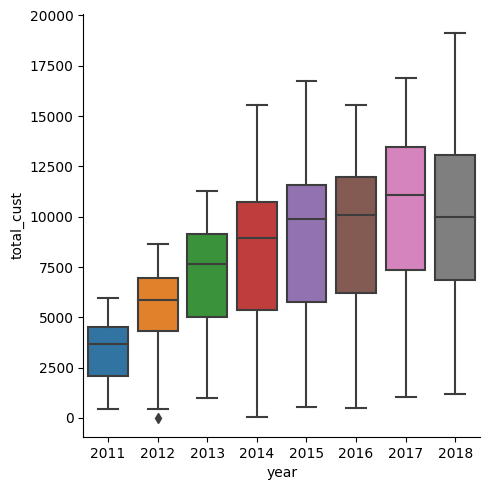

In [110]:
#Plotting customers during each year
sns.catplot(x='year',y='total_cust',kind='box',data=df_v2)

The plot above suggests that the total number of registrations increased over time. Although the number of customers increased, the growth rate slowed down in the following years, with the first few years seeing the fastest growth.

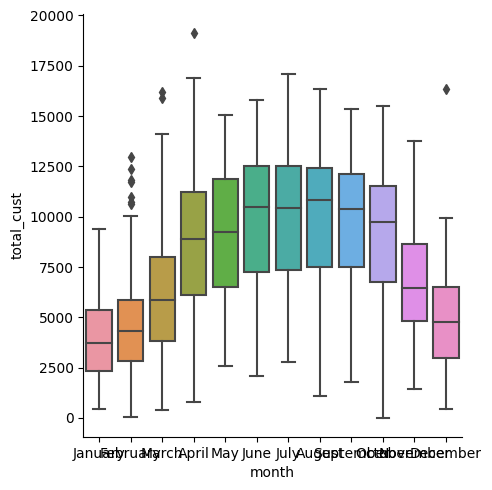

In [111]:
#Plotting total customers during each month
sns.catplot(x='month',y='total_cust',kind='box',data=df_v2)

The above plot suggests that there are generally fewer customers during the months of April through October, which correspond to summer and fall when temperatures are at their highest. This is in contrast to spring and winter, when temperatures are too low. We can also see that there are a few anomalies, such as the day in February when more people registered. We can presume that a few unique occurrences may have contributed to the higher number of registrations on that specific day.

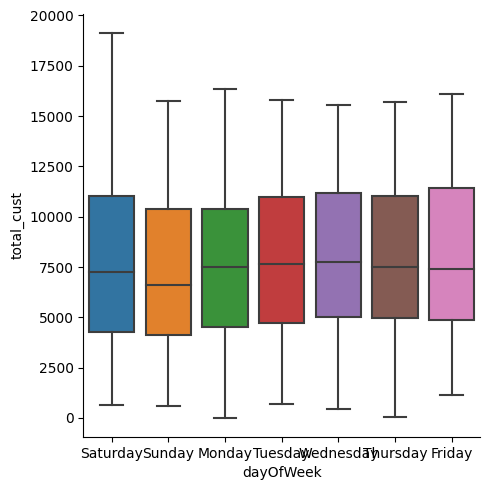

In [113]:
#Plotting customers per day of the week
sns.catplot(x='dayOfWeek',y='total_cust',kind='box',data=df_v2)

We can deduce from the above plot that there are marginally more patrons on weekdays than on weekends. Weekdays have a higher number because we can assume that more people travel to work during that time and use rental bikes more frequently.

<Axes: xlabel='ice', ylabel='total_cust'>

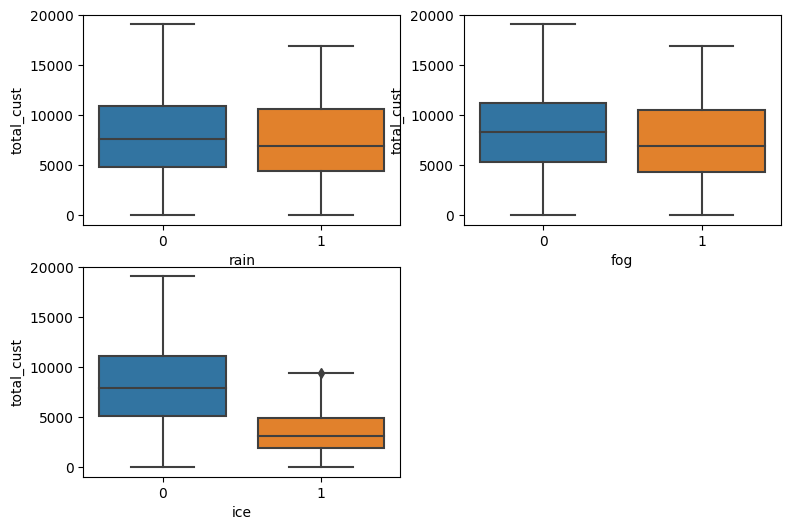

In [117]:
#Plotting total customers during each weather conditions
plt.figure(figsize = [9, 6])
plt.subplot(2,2,1)
sns.boxplot(x='rain',y='total_cust',data=df_v2)
plt.subplot(2,2,2)
sns.boxplot(x='fog',y='total_cust',data=df_v2)
plt.subplot(2,2,3)
sns.boxplot(x='ice',y='total_cust',data=df_v2)

From the plot above, we can analyse the customers behaviour during each particular weather conditions. Rain has only slight effect on the number of customers registered where as fog has a slightly more effect on the demand. But during the snow times, the demand for the rental bikes is very less as less cutomers chose to ride the bikes during snow.

<Axes: xlabel='holiday', ylabel='total_cust'>

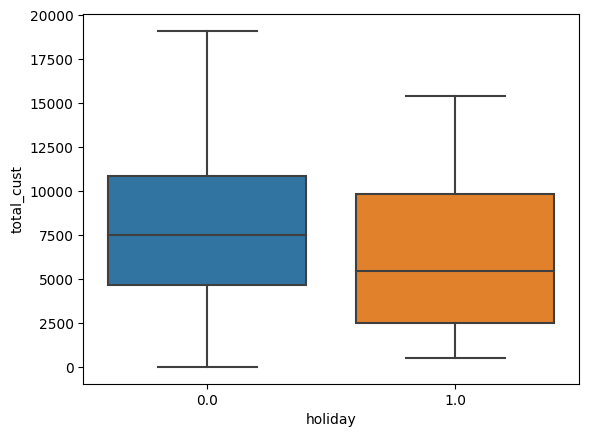

In [118]:
sns.boxplot(x='holiday',y='total_cust',data=df_v2)

The plot above illustrates that a greater number of customers reserved bikes outside of holidays. From the above plot, we can infer that the demand for the bikes is impacted by going to work.

# **Correlation plots and analysis**

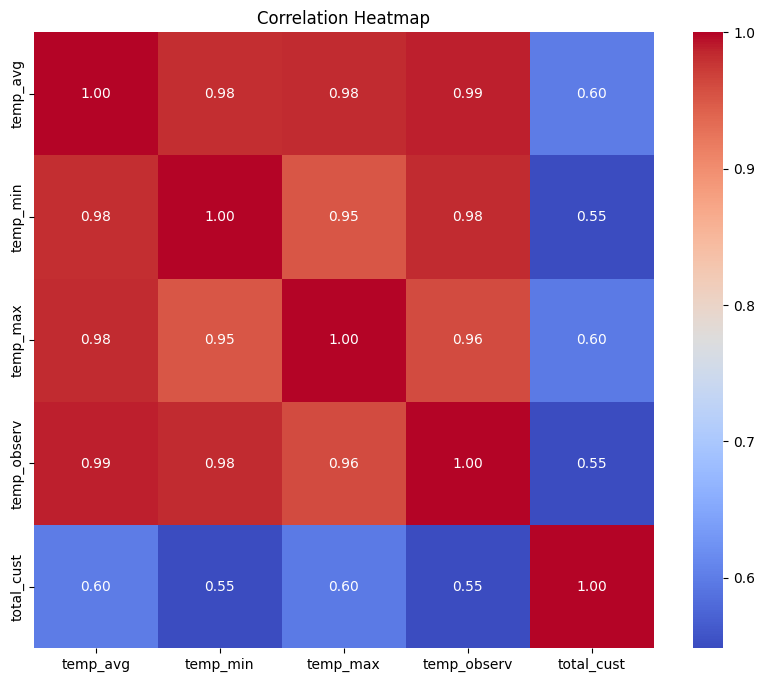

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_v2 is your DataFrame
correlation_matrix = df_v2[['temp_avg', 'temp_min', 'temp_max', 'temp_observ', 'total_cust']].corr()

# Plotting a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


To see the relationship between the temperature values and the total number of customers, we are plotting scatter plots in the plot above. It is evident that every temperature value has a perfect linear relationship. Moreover, there is a medium-level linear relationship between the temperature features and the total number of customers registered.

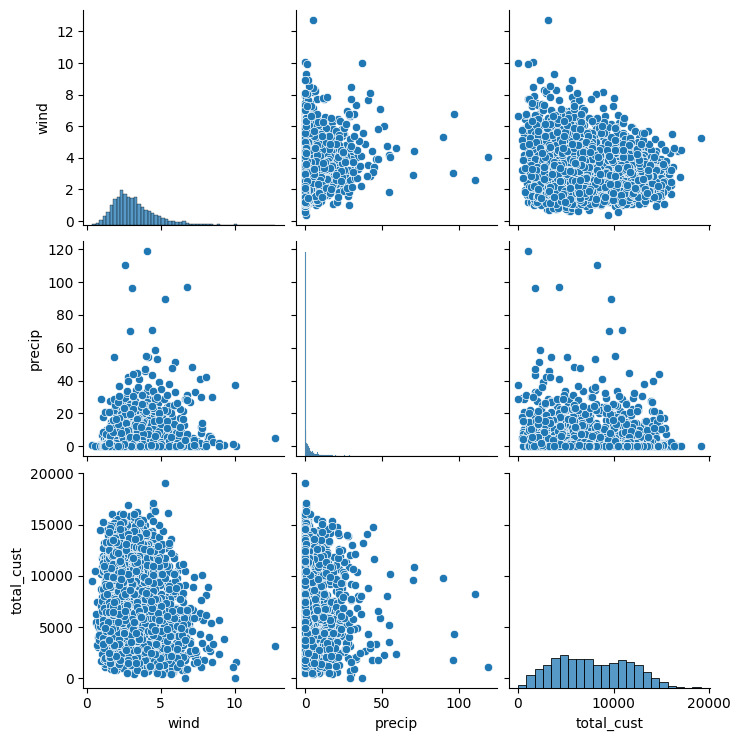

In [122]:
sns.pairplot(df_v2,vars = ['wind','precip','total_cust'])

The plot above suggests that wind and precipitation have very little impact on the overall number of customers.

<Axes: >

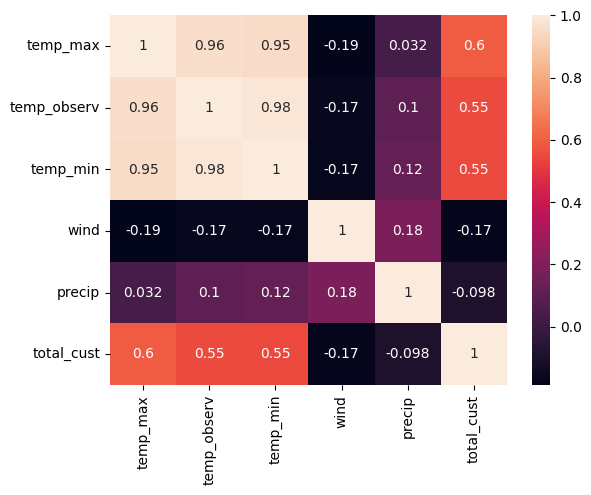

In [126]:
sns.heatmap(df_v2[[ 'temp_max', 'temp_observ','temp_min', 'wind', 'precip', 'total_cust']].corr(),annot=True)

More precise relationships between the variables are shown in the heatmap above. Although there is no discernible relationship between the target variable and wind or precipitation, we can observe that the temperature feature has a strong relationship with it.

To gain further insight, we will use the Pearson's Coefficient Test to determine whether the temperature variable and the target variable have a linear relationship.

In [127]:
print("Pearsonr test temp_avg ",pearsonr(df_v2['temp_avg'],df_v2['total_cust']))
print("Pearsonr test temp_max ",pearsonr(df_v2['temp_max'],df_v2['total_cust']))
print("Pearsonr test temp_min ",pearsonr(df_v2['temp_min'],df_v2['total_cust']))

Pearsonr test temp_avg  PearsonRResult(statistic=0.5992624450063637, pvalue=1.949004444509011e-284)
Pearsonr test temp_max  PearsonRResult(statistic=0.5962488355634555, pvalue=7.022821368275039e-281)
Pearsonr test temp_min  PearsonRResult(statistic=0.5484041948046313, pvalue=3.942337772205796e-229)


Pearson coefficient tells us how strong the relation is between two variables. From the above results we can see that temp_avg has stronger correlation with the target variable compared to temp_max and temp_min even though the difference is not much

In [128]:
df_v2.describe()

,temp_avg,temp_min,temp_max,temp_observ,precip,wind,casual,registered,total_cust,holiday,year
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,14.072317,8.506598,19.015674,11.069251,3.435623,3.163042,1677.561602,6042.021561,7719.583162,0.030459,2014.499658
std,9.536753,9.473867,9.835377,9.481130,8.183749,1.379595,1560.840858,2757.419767,3746.759171,0.171875,2.291531
min,-12.100000,-16.990000,-7.980000,-15.660000,0.000000,0.380000,2.000000,19.000000,21.000000,0.000000,2011.000000
25%,6.000000,0.520000,11.080000,3.015000,0.010000,2.200000,510.250000,3828.500000,4621.250000,0.000000,2012.250000
50%,14.770000,8.505000,19.990000,11.620000,0.270000,2.900000,1217.500000,5959.000000,7439.000000,0.000000,2014.500000
75%,22.800000,17.337500,27.877500,19.767500,2.887500,3.880000,2355.000000,8183.750000,10847.750000,0.000000,2016.000000
max,32.030000,26.210000,37.850000,28.670000,118.790000,12.750000,10173.000000,15419.000000,19113.000000,1.000000,2018.000000


## **Time-series data specific analysis**

We are dealing with a time series data. Apart from looking at the correlation plots and disctribution plots, we have to see if the data is stationary or non stationary. We will first plot line plots over time to check if the data is stationary or not.

<Axes: title={'center': 'Total customers registered over time'}, xlabel='date'>

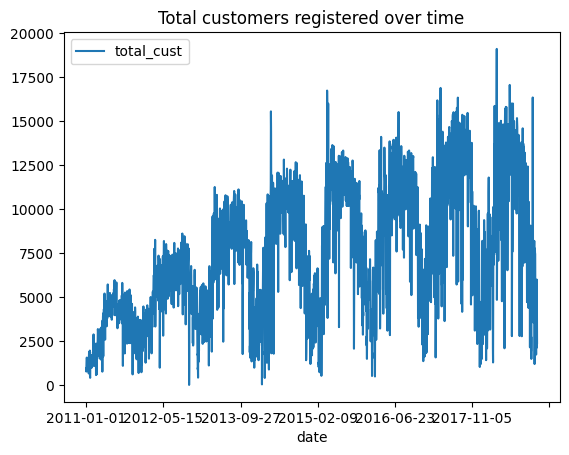

In [129]:
df_v2.plot(x='date',y='total_cust',title='Total customers registered over time')

We can see from the above plot that our time series problem is non-stationary. We have to deal with this before modelling part. For now, we just analyse and make inferences visually and descriptively.